In [1]:
%pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
DATASET_PATH = '../datasets/dogs_vs_cats'
DATASET_TRAIN = DATASET_PATH + '/train/PetImages'
DATASET_TEST = DATASET_PATH + '/test'
IMG_SIZE = (128,128) #sizeing all images to 150x150 pixel
BATCH_SIZE = 32
EPOCHS = 20

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import os
import numpy as np
import matplotlib.pyplot as plt

2025-06-12 18:13:54.480765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749732234.643780    4879 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749732234.689001    4879 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749732235.071644    4879 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749732235.071671    4879 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749732235.071673    4879 computation_placer.cc:177] computation placer alr

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_validation_data_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8,1.2],
    zoom_range=0.2,
    validation_split=0.2
)

testing_data_gen=ImageDataGenerator(
    rescale=1./255
)

In [6]:
SEED = 42              # For reproducibility

# Load train (70%) set
train_ds=training_validation_data_gen.flow_from_directory(
    DATASET_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=SEED,
    shuffle=True
)

val_ds=training_validation_data_gen.flow_from_directory(
    DATASET_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=SEED,
    shuffle=True
)

test_ds=testing_data_gen.flow_from_directory(
    DATASET_TEST,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=SEED,
    shuffle=True
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3), name='conv_1'),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 2
    Conv2D(64, (3,3), activation='relu', name='conv_2'),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 3
    Conv2D(128, (3,3), activation='relu', name='conv_3'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', name='conv_4'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten the output
    Flatten(),

    # Fully Connected Layer
    Dense(256, activation='relu'),

    # Output Layer (2 classes)
    Dense(1, activation='sigmoid') 
])

model.summary()

/home/bismuth/projects/ML/models/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749732242.525172    4879 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4 (Conv2D)                 │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,225 (10.48 MB)

 Trainable params: 2,748,225 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('CatDogCNN.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
EPOCHS = 50
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = EPOCHS,
  callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

/home/bismuth/projects/ML/models/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1749732244.969625    5359 service.cc:152] XLA service 0x7e465800d110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749732244.969640    5359 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-06-12 18:14:05.027942: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749732245.309895    5359 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/625 ━━━━━━━━━━━━━━━━━━━━ 55:52 5s/step - accuracy: 0.6562 - loss: 0.6897

I0000 00:00:1749732249.196485    5359 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


155/625 ━━━━━━━━━━━━━━━━━━━━ 57s 123ms/step - accuracy: 0.5271 - loss: 0.7030

/home/bismuth/projects/ML/models/.venv/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5371 - loss: 0.6924

625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 155ms/step - accuracy: 0.5372 - loss: 0.6924 - val_accuracy: 0.5658 - val_loss: 0.6739 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6155 - loss: 0.6546

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.6155 - loss: 0.6546 - val_accuracy: 0.6639 - val_loss: 0.6077 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6744 - loss: 0.6045

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.6745 - loss: 0.6045 - val_accuracy: 0.7231 - val_loss: 0.5459 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7141 - loss: 0.5610

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.7141 - loss: 0.5609 - val_accuracy: 0.7469 - val_loss: 0.5141 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7383 - loss: 0.5256

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.7383 - loss: 0.5256 - val_accuracy: 0.7727 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.7667 - loss: 0.4800 - val_accuracy: 0.7589 - val_loss: 0.4963 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7891 - loss: 0.4546

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.7891 - loss: 0.4545 - val_accuracy: 0.7963 - val_loss: 0.4285 - learning_rate: 0.0010
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8060 - loss: 0.4213

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 121ms/step - accuracy: 0.8060 - loss: 0.4213 - val_accuracy: 0.8281 - val_loss: 0.3766 - learning_rate: 0.0010
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.8213 - loss: 0.3958 - val_accuracy: 0.8311 - val_loss: 0.3808 - learning_rate: 0.0010
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8408 - loss: 0.3572

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.8409 - loss: 0.3572 - val_accuracy: 0.8483 - val_loss: 0.3511 - learning_rate: 0.0010
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8508 - loss: 0.3392

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.8508 - loss: 0.3392 - val_accuracy: 0.8449 - val_loss: 0.3500 - learning_rate: 0.0010
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8611 - loss: 0.3188

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.8611 - loss: 0.3188 - val_accuracy: 0.8541 - val_loss: 0.3416 - learning_rate: 0.0010
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8684 - loss: 0.3015

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.8684 - loss: 0.3015 - val_accuracy: 0.8547 - val_loss: 0.3218 - learning_rate: 0.0010
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8693 - loss: 0.2958

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.8693 - loss: 0.2958 - val_accuracy: 0.8677 - val_loss: 0.2915 - learning_rate: 0.0010
Epoch 15/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.8785 - loss: 0.2798 - val_accuracy: 0.8737 - val_loss: 0.2918 - learning_rate: 0.0010
Epoch 16/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8834 - loss: 0.2699 - val_accuracy: 0.8766 - val_loss: 0.2921 - learning_rate: 0.0010
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8776 - loss: 0.2761

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8776 - loss: 0.2761 - val_accuracy: 0.8946 - val_loss: 0.2581 - learning_rate: 0.0010
Epoch 18/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.8935 - loss: 0.2500 - val_accuracy: 0.8802 - val_loss: 0.2886 - learning_rate: 0.0010
Epoch 19/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.8943 - loss: 0.2432 - val_accuracy: 0.8924 - val_loss: 0.2602 - learning_rate: 0.0010
Epoch 20/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8955 - loss: 0.2447 - val_accuracy: 0.8880 - val_loss: 0.2612 - learning_rate: 0.0010
Epoch 21/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9028 - loss: 0.2330 - val_accuracy: 0.8806 - val_loss: 0.2650 - learning_rate: 0.0010
Epoch 22/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9053 - loss: 0.2215

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9053 - loss: 0.2216 - val_accuracy: 0.8910 - val_loss: 0.2558 - learning_rate: 0.0010
Epoch 23/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9078 - loss: 0.2216

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9078 - loss: 0.2216 - val_accuracy: 0.9054 - val_loss: 0.2339 - learning_rate: 0.0010
Epoch 24/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9052 - loss: 0.2221 - val_accuracy: 0.9054 - val_loss: 0.2342 - learning_rate: 0.0010
Epoch 25/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.9085 - loss: 0.2151 - val_accuracy: 0.8980 - val_loss: 0.2409 - learning_rate: 0.0010
Epoch 26/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9114 - loss: 0.2117 - val_accuracy: 0.8942 - val_loss: 0.2667 - learning_rate: 0.0010
Epoch 27/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9138 - loss: 0.2063 - val_accuracy: 0.9006 - val_loss: 0.2442 - learning_rate: 0.0010
Epoch 28/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.9157 - loss: 0.2023 - val_accuracy: 0.9038 - val_loss: 0.2408 - learning_rate: 0.0010
Epoch 29/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9182 - l

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9182 - loss: 0.1969 - val_accuracy: 0.8998 - val_loss: 0.2270 - learning_rate: 0.0010
Epoch 30/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9159 - loss: 0.1947 - val_accuracy: 0.8982 - val_loss: 0.2607 - learning_rate: 0.0010
Epoch 31/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9232 - loss: 0.1861 - val_accuracy: 0.8932 - val_loss: 0.2578 - learning_rate: 0.0010
Epoch 32/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9252 - loss: 0.1867 - val_accuracy: 0.9028 - val_loss: 0.2365 - learning_rate: 0.0010
Epoch 33/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9240 - loss: 0.1803

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9240 - loss: 0.1803 - val_accuracy: 0.9094 - val_loss: 0.2221 - learning_rate: 0.0010
Epoch 34/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9226 - loss: 0.1810 - val_accuracy: 0.9000 - val_loss: 0.2391 - learning_rate: 0.0010
Epoch 35/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9260 - loss: 0.1787

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.9260 - loss: 0.1787 - val_accuracy: 0.9096 - val_loss: 0.2197 - learning_rate: 0.0010
Epoch 36/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9288 - loss: 0.1724 - val_accuracy: 0.9114 - val_loss: 0.2249 - learning_rate: 0.0010
Epoch 37/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9300 - loss: 0.1672

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9300 - loss: 0.1672 - val_accuracy: 0.9096 - val_loss: 0.2173 - learning_rate: 0.0010
Epoch 38/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9262 - loss: 0.1732 - val_accuracy: 0.9082 - val_loss: 0.2552 - learning_rate: 0.0010
Epoch 39/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9280 - loss: 0.1755 - val_accuracy: 0.9090 - val_loss: 0.2277 - learning_rate: 0.0010
Epoch 40/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9309 - loss: 0.1672 - val_accuracy: 0.9084 - val_loss: 0.2369 - learning_rate: 0.0010
Epoch 41/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9299 - loss: 0.1687 - val_accuracy: 0.8910 - val_loss: 0.3038 - learning_rate: 0.0010
Epoch 42/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9369 - loss: 0.1568

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9369 - loss: 0.1568 - val_accuracy: 0.9154 - val_loss: 0.2136 - learning_rate: 0.0010
Epoch 43/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9337 - loss: 0.1559

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.9337 - loss: 0.1559 - val_accuracy: 0.9216 - val_loss: 0.1931 - learning_rate: 0.0010
Epoch 44/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9370 - loss: 0.1519 - val_accuracy: 0.9150 - val_loss: 0.2194 - learning_rate: 0.0010
Epoch 45/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9343 - loss: 0.1579 - val_accuracy: 0.9190 - val_loss: 0.2129 - learning_rate: 0.0010
Epoch 46/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9361 - loss: 0.1555 - val_accuracy: 0.9116 - val_loss: 0.2156 - learning_rate: 0.0010
Epoch 47/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9396 - loss: 0.1459 - val_accuracy: 0.9166 - val_loss: 0.2081 - learning_rate: 0.0010
Epoch 48/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9382 - loss: 0.1494 - val_accuracy: 0.9156 - val_loss: 0.2170 - learning_rate: 0.0010
Epoch 49/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9424 -

In [10]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9644 - loss: 0.1059
Test Accuracy: 0.9640


In [11]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int)

print(confusion_matrix(test_ds.classes, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
[[239 261]
 [239 261]]


Filters shape for conv_1: (3, 3, 3, 32)


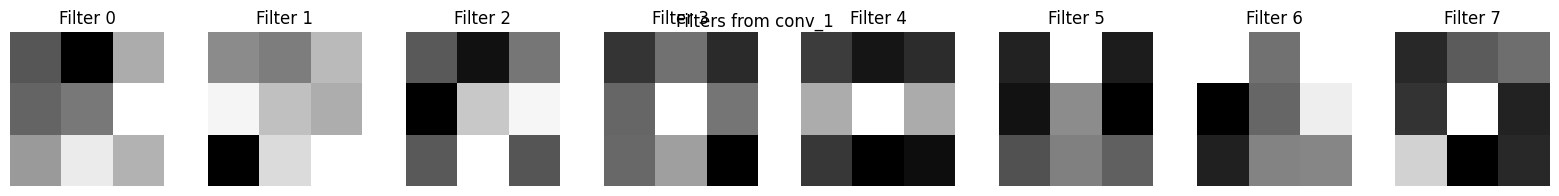

In [12]:
# Function to visualize filters
def visualize_filters(model, layer_name, num_filters=8):
    # Get the weights of the specified layer
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()  # Shape: (filter_height, filter_width, input_channels, num_filters)
    print(f"Filters shape for {layer_name}: {filters.shape}")

    # Normalize filter values to [0, 1] for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot the filters
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 2))
    for i in range(num_filters):
        if i < filters.shape[-1]:  # Ensure we don't exceed available filters
            # Extract the i-th filter (3x3x3 for RGB input in conv1)
            f = filters[:, :, :, i]
            # If RGB, average across channels or pick one channel (e.g., 0 for red)
            f = np.mean(f, axis=2) if f.shape[2] == 3 else f
            axes[i].imshow(f, cmap='gray')
            axes[i].axis('off')
            axes[i].set_title(f'Filter {i}')
    plt.suptitle(f'Filters from {layer_name}')
    plt.show()

# Visualize filters from the first convolutional layer
visualize_filters(model, 'conv_1', num_filters=8)

# Optionally visualize filters from other layers
# visualize_filters(model, 'conv2', num_filters=8)
# visualize_filters(model, 'conv3', num_filters=8)

In [13]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'test_cat.jpg'  # Replace with the actual path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match your model's input

# Convert image to a NumPy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (if necessary)
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

In [14]:
# Make the prediction
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
Prediction: Cat
